<a href="https://colab.research.google.com/github/aidanjjoyce/Black-Hole-Simulations/blob/main/Black_Hole_Simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2D Black Holes Simulations

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


# Newtonian Gravity

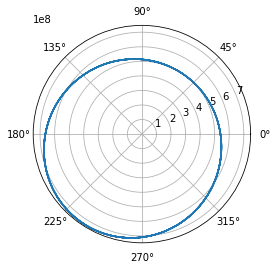

In [ ]:
##Newtonian gravity

# Plots a Newtonian orbit 
def plotNewtonianOrbit(r0, G, M, h, angle):
  
  def shape_eqn(r, p, G, M, h):
    return [r[1], 2/r[0]*r[1]**2 + r[0] - G*M*r[0]**2/h**2]

  ps = np.linspace(1,10*np.pi,10000)
  rs = odeint(shape_eqn, r0, ps, args=(G,M,h))
  rs = abs(rs[:,0])

  plt.polar(ps, rs)
  plt.show()


r0, G, M, h, angle = [5e8,0], 7e-11, 6e24, 5e11, 10*np.pi
plotNewtonianOrbit(r0, G, M, h, angle)

[[1.00000000e+00 0.00000000e+00]
 [6.08653054e+02 1.92156768e-04]
 [9.66155046e+02 3.05208826e-04]
 ...
 [6.06652162e+04 1.92106079e-02]
 [6.07056228e+04 1.92234576e-02]
 [6.07460154e+04 1.92363030e-02]]


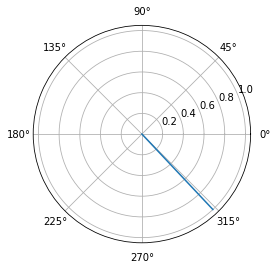

In [ ]:
##Plots the path of an unbound orbit

x0, E, h, M, G, m = [1,0], 0, 1e-3, 1, 1e10, 1

def odes(x, t, E, h, m, M, G):
  R = x[0]
  P = x[1]
  return [np.sqrt(2*E/m - h**2/2*m*R**2 + G*M/R), np.sqrt(h/R)]

ts = np.linspace(0, 100, 1000)
xs = odeint(odes, x0, ts, args=(E, h, m, M, G))
print(xs)

plt.polar(xs[1], xs[0])
plt.show()


# The Schwarzschild Metric

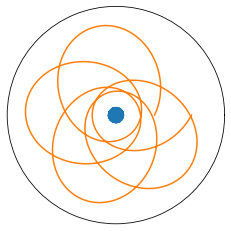

In [65]:
#Schwarzschild gravity precession

#Defines the ODE describing radius change, r, with angle, p, in the 
#Schwarzschild metric

def shape_eqn(r, p, G, M, c, h):
  return [r[1], 2/r[0]*r[1]**2 + r[0] - G*M*r[0]**2/h**2 - 3*G*M/c**2]

#Calculates the Schwarzschild radius for given G, M, c

G, M, c = 7e-11, 6e24, 3e8
Rs = 2*G*M/c**2

#Plots the event horizon of the black hole

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ps = np.linspace(0, 932*np.pi,2000)
ax.plot(ps,[i * Rs / samples for i in range(0, 2000, 1) ])
ax.set_rticks([])
ax.set_xticks([])
ax.grid(False)

#Plots an orbit with given initial radius, dr/dp, and h

r0 = [10*Rs,5*Rs]                              #Initial radius and dr/dp
hCirc = np.sqrt(G*M*r0[0]**2/(r0[0] - 3*Rs/2)) #h required for circular orbit
h = 1*hCirc
samples = 1000
ps = np.linspace(0,10*np.pi,samples)
rs = odeint(shape_eqn, r0, ps, args=(G,M,c,h))
ax.plot(ps, rs[:,0])            
ax.set_rmax(1.2*np.amax(rs))

plt.show()

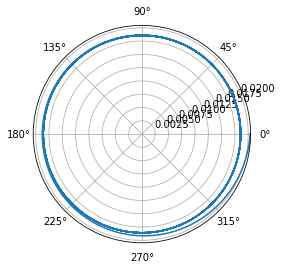

In [ ]:
##Schwarzschild gravity infall

##Parameters required: k, h, G, M, r0
##Variables: u, p

r0, G, M, h, c = [5e8,0], 7e-11, 6e24, 5e11, 3e8
Rs = 2*G*M/c**2
r0 = [1.99*Rs, 0]
h = np.sqrt((G*M*r0[0]**2)/(r0[0]-3/2*Rs))

def shape_eqn(r, p, G, M, h, c):
  return [r[1], 2/r[0]*r[1]**2 + r[0] - G*M*r[0]**2/h**2 - 3*G*M/c**2]

ps = np.linspace(1,20*np.pi,10000)
rs = odeint(shape_eqn, r0, ps, args=(G,M,h,c))
rs = abs(rs[:,0])

plt.polar(ps, rs)
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[2.80000000e-02 2.80000022e-02 2.80000080e-02 ... 3.29545951e+02
 3.29595962e+02 3.29642051e+02]


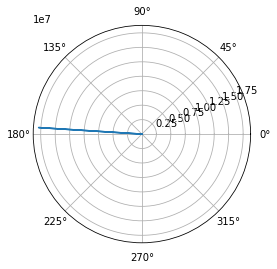

In [ ]:
##Schwarzschild gravitational lensing for photons

##Parameters required: k, h, G, M, r0
##Variables: u, p

G, M, c = 7e-11, 6e24, 3e8
Rs = 2*G*M/c**2
r0 = [3*Rs, 0]

def shape_eqn(r, p, G, M, c):
  return [r[1], 2/r[0]*r[1]**2 + r[0] - 3*G*M/c**2]

ps = np.linspace(1,2*np.pi,10000)
rs = odeint(shape_eqn, r0, ps, args=(G,M,c))
rs = abs(rs[:,0])
print(rs)

plt.polar(ps, rs)
plt.show()

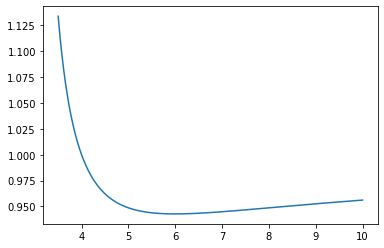

In [ ]:
##Plots the energy of circular orbits around Schwarzschild black hole
mu = 1

def k(r, mu):
  return (1 - 2*mu/r) / np.sqrt(1-3*mu/r)

rs = np.linspace(3.5*mu,10*mu, 1000)
ks = k(rs, mu)
plt.plot(rs,ks)
plt.show()

##The Precession of Mercury's Orbit

##Stability of Orbits

##Gravitational Lensing

# The Kerr Metric

<function matplotlib.pyplot.show(*args, **kw)>

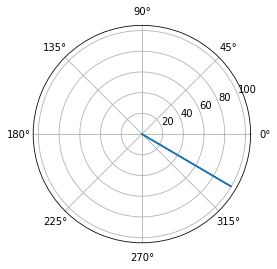

In [ ]:
##Kerr metric orbit plotter

##Need to solve 3 coupled 1st order ODEs in r/t/p
k,c,a,h,mu = 1,1,0.5,10,1

def odes(x,tau,k,c,a,h,mu):
  #Assign each ODE to a vector
  k, c, a, h, mu

  T = x[0]
  R = x[1]
  P = x[2]

  #Define discriminant
  D = R**2 - 2*mu*R + a**2

  dt = (k*c*((R+2*mu)*a**2 + R**3) - 2*h*a*mu) / (R*D*c)
  dp = (h*(R - 2*mu) + 2*k*c*a*mu) / (R*D)
  dr = np.sqrt(c**2*(k**2 - 1) + 2*mu*c**2/R - (h**2 - a**2*c**2*(k**2 - 1))/R**2 + 2*mu*(h-a*c*k)**2/R**3)
  
  return [dt,dp,dr]

x0 = [0, 100, 0]
t = np.linspace(0,1,1000)
y = odeint(odes,x0,t, args=(k,c,a,h,mu))

plt.polar(y[2],y[1])
plt.show

## The Ergosphere

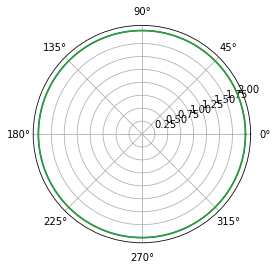

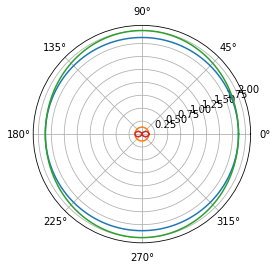

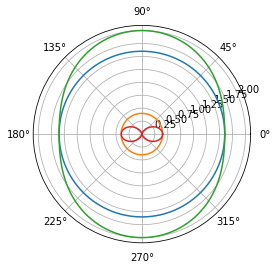

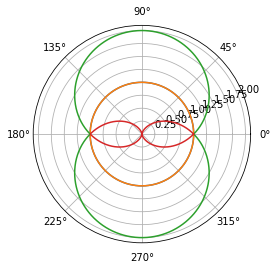

In [ ]:
##Event horizon and ergosphere plotter

def KerrSurfaces(mu, a):

  def event_horizon():
    return [mu+np.sqrt(mu**2 - a**2), mu-np.sqrt(mu**2 -a**2)] 

  def SLS(T):
    return [mu+np.sqrt(mu**2 - a**2 * np.cos(T)**2), mu-np.sqrt(mu**2 -a**2 * np.cos(T)**2)]

  T = np.linspace(0,2*np.pi,1000)
  EH0 = np.full((1000,), event_horizon()[0])
  EH1 = np.full((1000,), event_horizon()[1])

  fig1, ax1 = plt.subplots(subplot_kw={'projection': 'polar'})
  ax1.plot(T,EH0)
  ax1.plot(T,EH1)
  ax1.plot(T,SLS(T)[0])
  ax1.plot(T,SLS(T)[1])

KerrSurfaces(1,0)
KerrSurfaces(1,0.5) 
KerrSurfaces(1,0.8)
KerrSurfaces(1,1)
